In [66]:
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import scipy.misc

In [188]:
def Z(N, L, s):
    free_space = L-2.0*N*s
    if free_space > 0:
        return math.pow(free_space, N)
    else:
        return 0

In [187]:
def bead_p(x, L, N, s):
    Normaliz = Z(N, L, s)
    total = 0 
    for k in range(0, int(N)):
        term = scipy.misc.comb(N-1, k) * Z(k, x-s, s) * Z(N-1-k, L-x-s, s)
        total = total+term
        
    return total/Normaliz 

In [189]:
def bead_cdf(x, L, N, s, delta):
    #report CDF up to x 
    cdf = 0.0 
    allcdfs = []
    for i in np.arange(0, x, delta):
        #cdf = cdf + 
        allcdfs.append(bead_p(i, L, N, s))
    return np.cumsum(allcdfs)

In [180]:
N=50.0
s=0.23
L=24.0

In [185]:
#free space check. Should be positive
L-2*N*s

1.0

In [154]:
Z(N, L, s)

1.2676506002282294e+30

In [155]:
bead_p(12.0, L, N, s)

0.041729057932173345

In [162]:
delta = 0.01
bead_cdf(L, L, N, s, delta)*delta

array([0.    , 0.    , 0.    , ..., 0.9975, 0.9975, 0.9975])

Text(0.5,1,'L=24.0, N=50.0, s=0.23')

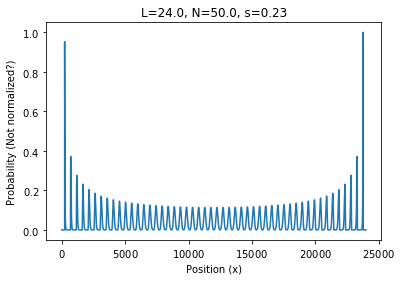

In [182]:
delta = 0.001
plt.plot([bead_p(x, L, N, s) for x in np.arange(0,L,delta)])
plt.xlabel("Position (x)")
plt.ylabel("Probability (Not normalized?)")
plt.title("L={}, N={}, s={}".format(L, N, s))

Text(0.5,1,'L=24.0, N=50.0, s=0.23')

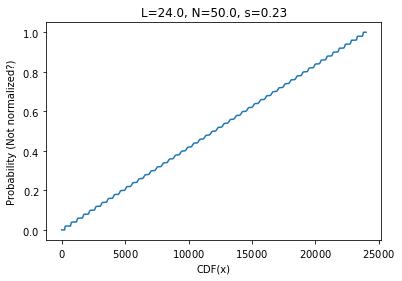

In [183]:
delta = 0.001
plt.plot(bead_cdf(L, L, N, s, delta)*delta)
plt.xlabel("CDF(x)")
plt.ylabel("Probability (Not normalized?)")
plt.title("L={}, N={}, s={}".format(L, N, s))